In [22]:
from XRStools import xrs_read, xrs_extraction

In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [24]:
path = '/Users/katherinegraves/OneDrive - University of Leeds/PhD/Synchrotron/APS/Nov2019_NRIXS/XRSS/2019-11_20ID-APS/CNT-IndStd/'

In [25]:
myq = [2,5,8,9,10]

In [26]:
cnt = xrs_read.read_lerix(exp_dir=path,elastic_name='elastic',nixs_name='nixs',wide_name='wide')

>> >> Warning!! skipped empty scan (<7KB):  nixs_test.0001


In [27]:
cnt.nixs_scans

['nixs.0001', 'nixs.0002']

In [28]:
cnt.load_elastics(analyzers='2,5,8,9,10')

Reading elastic scan:  elastic.0001
Reading elastic scan:  elastic.0002
Reading elastic scan:  elastic.0003
Reading elastic scan:  elastic.0004
list of analysers for E0 calculation must be a list type.


In [35]:
cnt.load_elastics(analyzers=myq)
#get E0 and FWHM of peaks to be used in gaussian fitting script
# MAKE SURE TO SAVE TO DOCUMENT

Reading elastic scan:  elastic.0001
Reading elastic scan:  elastic.0002
Reading elastic scan:  elastic.0003
Reading elastic scan:  elastic.0004
Running 'Update_Cenom' Script for analysers: [2, 5, 8, 9, 10]
E0 was found to be (keV):  9.89030626338
Average FWHM for the elastics is (eV):  0.494948951356


In [36]:
cnt.load_elastics(analyzers='all')

Reading elastic scan:  elastic.0001
Reading elastic scan:  elastic.0002
Reading elastic scan:  elastic.0003
Reading elastic scan:  elastic.0004
Running 'Update_Cenom' Script for All analysers
E0 was found to be (keV):  9.89039919629
Average FWHM for the elastics is (eV):  nan
Analyzer04 Elastic peak is less than 100 counts, setting to average e0
Analyzer12 Elastic peak is less than 100 counts, setting to average e0
Analyzer13 Elastic peak is less than 100 counts, setting to average e0
Analyzer19 Elastic peak is less than 100 counts, setting to average e0


In [37]:
cnt.nixs_scans

['nixs.0001', 'nixs.0002']

In [38]:
cnt.load_nixs()

Reading NIXS scan:  nixs.0001
Reading NIXS scan:  nixs.0002


In [39]:
cnt.load_wides()

Reading Wide scan:  wide.0001


In [40]:
# load all elastics, nixs and wides in one go
cnt.load_elastics(analyzers='all')
cnt.load_nixs()
cnt.load_wides()

Reading elastic scan:  elastic.0001
Reading elastic scan:  elastic.0002
Reading elastic scan:  elastic.0003
Reading elastic scan:  elastic.0004
Running 'Update_Cenom' Script for All analysers
E0 was found to be (keV):  9.89039919629
Average FWHM for the elastics is (eV):  nan
Analyzer04 Elastic peak is less than 100 counts, setting to average e0
Analyzer12 Elastic peak is less than 100 counts, setting to average e0
Analyzer13 Elastic peak is less than 100 counts, setting to average e0
Analyzer19 Elastic peak is less than 100 counts, setting to average e0
Reading NIXS scan:  nixs.0001
Reading NIXS scan:  nixs.0002
Reading Wide scan:  wide.0001


In [41]:
cnt.join_nixs_wide(scaling='none')

Successfully joined the wide and nixs scans.


In [42]:
# TEST ANALYSERS
# %matplotlib notebook
# plt.plot(cnt.eloss,cnt.signals[:,[4]]) #interactive plot window to look at each analyser output
# plt.show()

<IPython.core.display.Javascript object>


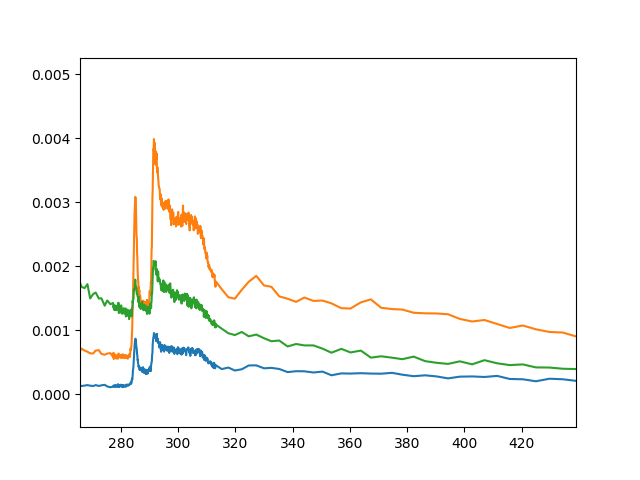

In [43]:
%matplotlib notebook
plt.plot(cnt.eloss,cnt.signals[:,[2,5,8]]) #interactive plot window to look at each analyser output
plt.show()

In [210]:
cnt.save_H5(H5name='PS_CNT_369_TAKE2')

ValueError: Unable to create group (name already exists)

In [44]:
cnt.update_cenom(analyzers='all')

Running 'Update_Cenom' Script for All analysers
E0 was found to be (keV):  9.89039919629
Average FWHM for the elastics is (eV):  nan
Analyzer04 Elastic peak is less than 100 counts, setting to average e0
Analyzer12 Elastic peak is less than 100 counts, setting to average e0
Analyzer13 Elastic peak is less than 100 counts, setting to average e0
Analyzer19 Elastic peak is less than 100 counts, setting to average e0


In [45]:
cnt_ex = xrs_extraction.edge_extraction(cnt,['C'],[1.0],{'C':['K']})

In [46]:
from XRStools import xrs_extraction

In [47]:
cnt_ex.analyzerAverage([2,5,8],errorweighing=False)

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


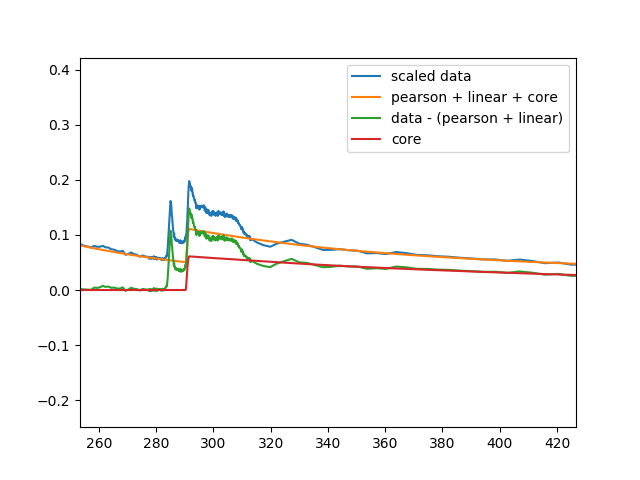

The fit parameters are:  [-2.99218534e+02  3.40760962e+02  1.37946158e+01  2.49422445e+01
  7.94343999e-17  1.75937347e-02  1.69830000e+00]


In [58]:
%matplotlib
cnt_ex.removeCorePearsonAv('C','K',[100,280.0],[330.0,450.0],weights=[2,1],HFcore_shift=5.9,scaling=1.7)

In [59]:
cnt_ex.save_average_Sqw(os.path.join(path,'comMWCNT_data[369]_extract_BETTERSUBTRACT.dat'), emin=275,emax=340)

In [23]:
cnt_ex.sqwav

array([-7.77152158e-02, -1.67075856e+00, -1.88301166e+00, -1.82140068e+00,
       -1.70266202e+00, -1.63345653e+00, -1.58166419e+00, -1.51479837e+00,
       -1.48204356e+00, -1.34954199e+00, -1.27305350e+00, -1.19127270e+00,
       -1.12213330e+00, -1.09187320e+00, -1.01330387e+00, -1.00120305e+00,
       -9.35672081e-01, -9.09215604e-01, -8.43457706e-01, -8.27171839e-01,
       -7.87877498e-01, -7.73447825e-01, -7.10691412e-01, -6.74516420e-01,
       -6.51493383e-01, -5.88682498e-01, -5.47202835e-01, -5.06087598e-01,
       -4.64772268e-01, -4.42073893e-01, -4.12172159e-01, -4.01663127e-01,
       -3.67713715e-01, -3.84849219e-01, -3.38042139e-01, -3.25396885e-01,
       -3.03457834e-01, -2.84674233e-01, -2.79149063e-01, -2.61662446e-01,
       -2.35783842e-01, -2.20033970e-01, -2.27344761e-01, -2.19951276e-01,
       -2.06975362e-01, -2.04279147e-01, -2.27274074e-01, -1.83128734e-01,
       -1.64801973e-01, -1.75234752e-01, -1.34257258e-01, -1.54936892e-01,
       -1.49012273e-01, -